In [1]:
#### Loading the packages to be used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import print_function  # Python 2 and 3
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
# show all output and more columns and rows
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 410
pd.options.display.max_rows = 2000

In [2]:
drug= pd.read_csv('drug.csv')
drug.head(1)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC11,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,logprice,price
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878


In [257]:
# only using columns from FDA
#['Explanation_Code']+['OTC']+['Classification_for_Rate_Setting']+
df=drug.loc[:,['DOSAGEFORMNAME']+['ROUTENAME'] +['LABELERNAME']+ ['STARTMARKETINGDATE']  + ['PHARM_CLASSES'] + ['MARKETINGCATEGORYNAME']+['DEASCHEDULE']+['logprice']+['price']]
df.shape
df.describe()

(13102, 9)

,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009666e+07,-1.188063,11.606463
std,7.176009e+04,2.003364,278.146418
min,1.900011e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [258]:
# imputation by mean
df.loc[df['STARTMARKETINGDATE']< 1.92e7,'STARTMARKETINGDATE']=2.009666e+07

In [259]:
df.head(2)
df.describe()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
0,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
1,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878


,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009674e+07,-1.188063,11.606463
std,7.111767e+04,2.003364,278.146418
min,1.947073e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [143]:
print (df['DOSAGEFORMNAME'].value_counts(dropna=False))   #print(drug['APPLICATIONNUMBER'].value_counts(dropna=False))

TABLET                                            7658
CAPSULE                                           1325
TABLET, EXTENDED RELEASE                           858
SOLUTION                                           371
CAPSULE, EXTENDED RELEASE                          345
CREAM                                              255
KIT                                                201
POWDER, FOR SOLUTION                               186
SOLUTION/ DROPS                                    165
SUSPENSION                                         159
TABLET, ORALLY DISINTEGRATING                      154
OINTMENT                                           150
TABLET, CHEWABLE                                   142
POWDER, FOR SUSPENSION                             134
CAPSULE, LIQUID FILLED                             101
GEL                                                 93
INJECTION, SOLUTION                                 87
INJECTION                                           60
CAPSULE, C

In [272]:
len(df.DOSAGEFORMNAME.unique())    # 80 categoriese

57

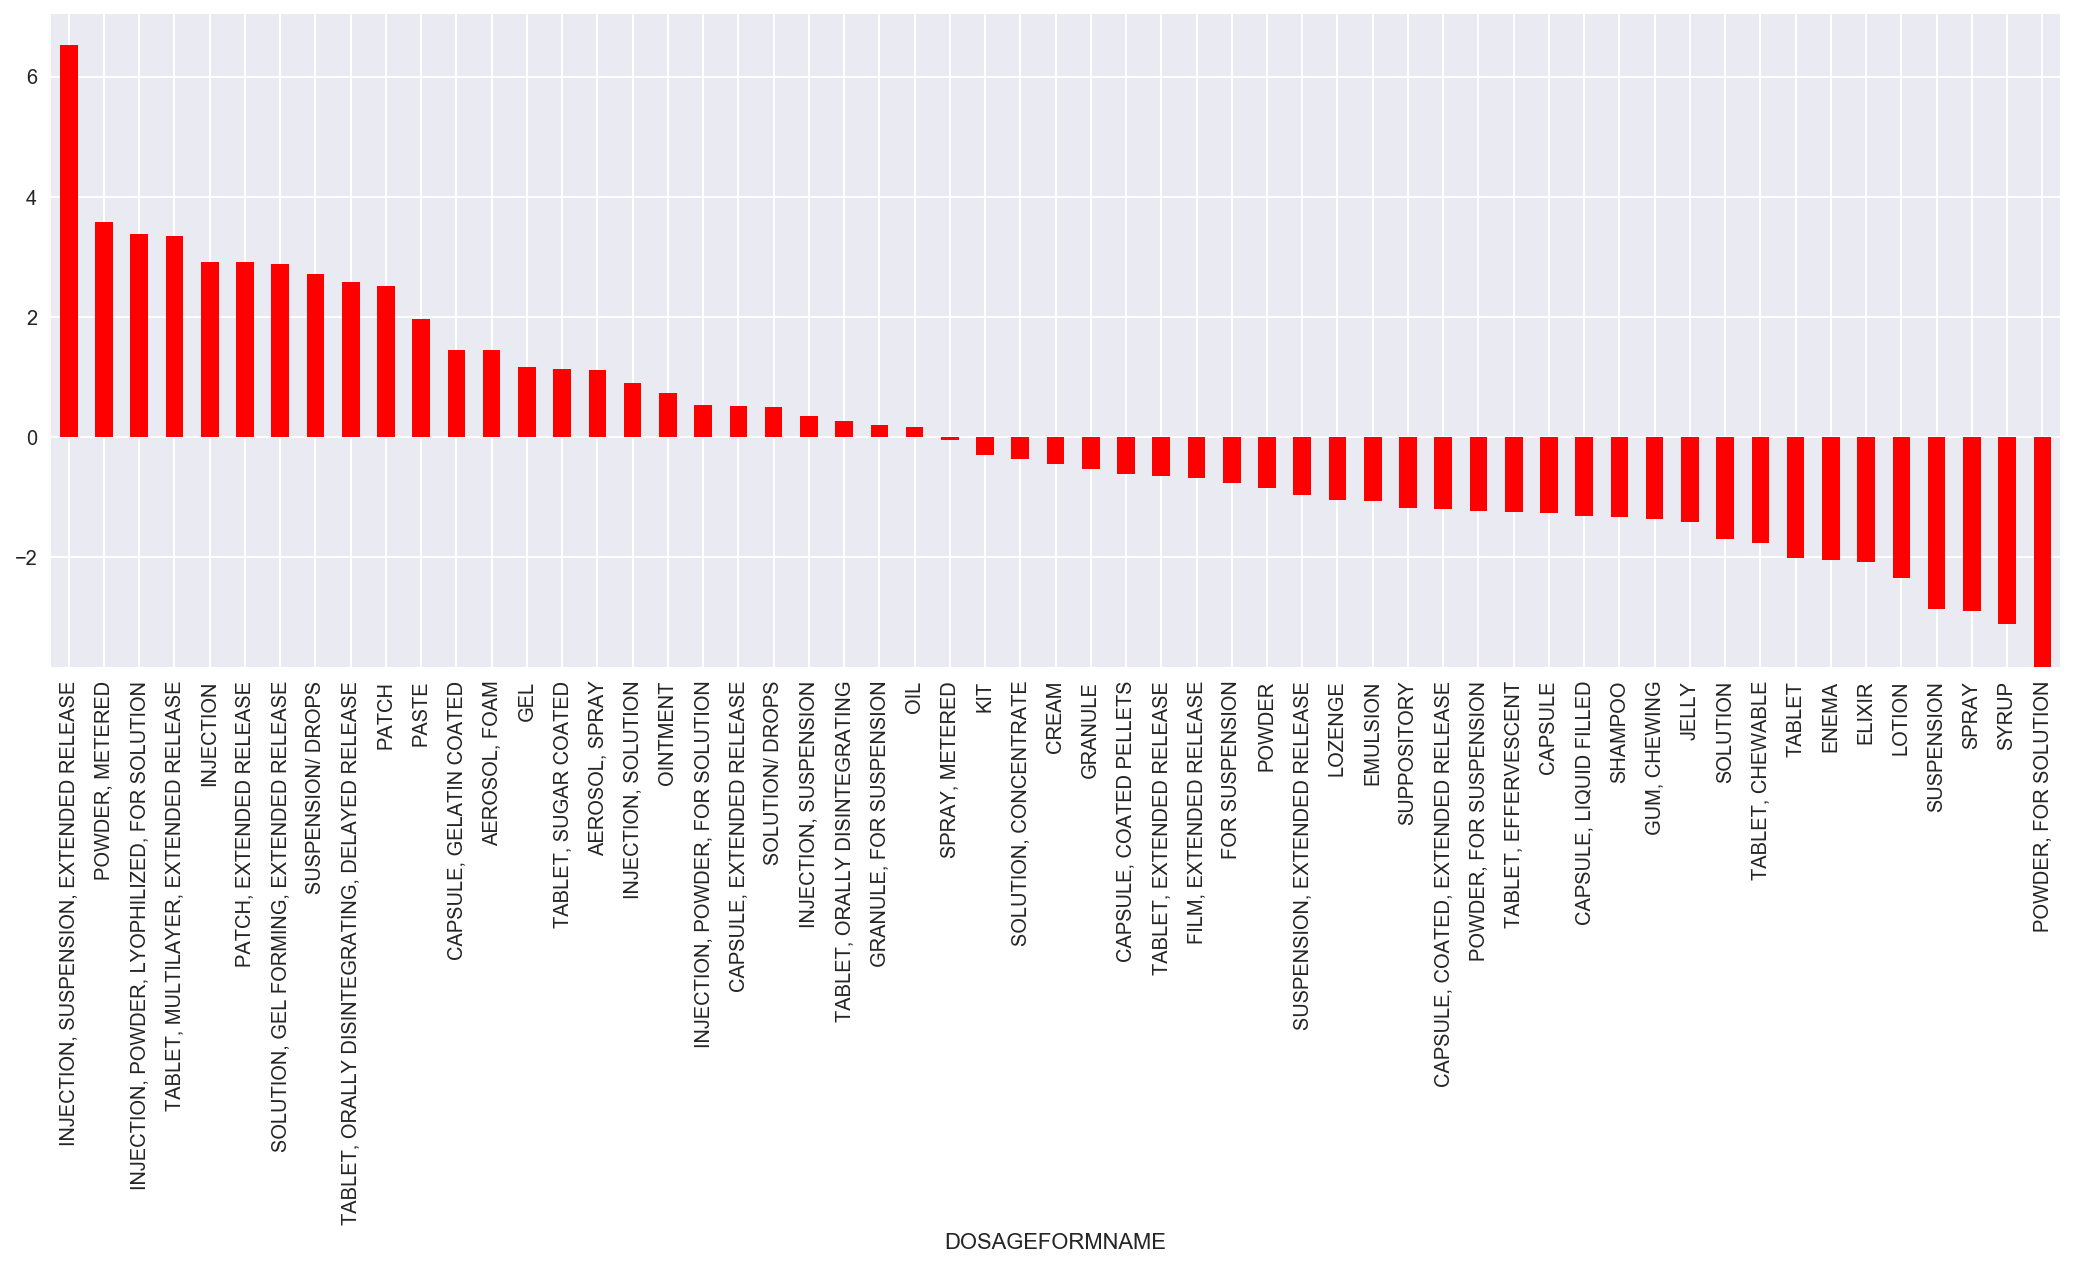

In [145]:
plt.figure(figsize=(18,6))
df.groupby('DOSAGEFORMNAME')['logprice'].median().sort_values(ascending=False).plot.bar(color='r')

In [146]:
df.groupby('DOSAGEFORMNAME')['price'].median().sort_values(ascending=False)

DOSAGEFORMNAME
INJECTION, SUSPENSION, EXTENDED RELEASE           681.881110
POWDER, METERED                                    35.987870
INJECTION, SUSPENSION                              34.973655
INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION       29.511670
TABLET, MULTILAYER, EXTENDED RELEASE               28.510760
INJECTION                                          18.540300
PATCH, EXTENDED RELEASE                            18.489050
SOLUTION, GEL FORMING, EXTENDED RELEASE            18.098760
SUSPENSION/ DROPS                                  15.090360
TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE     13.317260
PATCH                                              12.513320
PASTE                                               7.224395
CAPSULE, GELATIN COATED                             4.376350
AEROSOL, FOAM                                       4.257155
GEL                                                 3.210600
TABLET, SUGAR COATED                                3.132450
AEROSOL, 

In [52]:
D1=pd.DataFrame(df['DOSAGEFORMNAME'].value_counts(dropna=False),index= None)

In [73]:
D1= D1.reset_index(drop=True)

In [69]:
D1.index

RangeIndex(start=0, stop=80, step=1)

In [61]:
D1.rename(columns={'index': 'dose', 'DOSAGEFORMNAME': 'count'}, inplace=True)

In [30]:
D2= pd.DataFrame(df.groupby('DOSAGEFORMNAME')['logprice'].median().sort_values(ascending=False))

In [75]:
D2.rename(columns={'DOSAGEFORMNAME': 'dose'}, inplace=True)

In [70]:
D2= D2.reset_index(drop=False)

In [71]:
D2.index

RangeIndex(start=0, stop=80, step=1)

In [78]:
D1.head(3) ; D2.head(3)
D1.shape,D2.shape

,index,dose,count
0,0,TABLET,4583
1,1,"TABLET, FILM COATED",2722
2,2,CAPSULE,1089


,dose,logprice
0,"INJECTION, SUSPENSION, EXTENDED RELEASE",6.524855
1,"POWDER, METERED",3.932549
2,"INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION",3.384786


((80, 3), (80, 2))

In [80]:
D3=pd.merge(D1,D2, on='dose',how='inner')

In [82]:
D3.to_csv('Doseage.csv',index=0)

In [260]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, FILM COATED','DOSAGEFORMNAME']= 'TABLET'

In [261]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, FILM COATED, EXTENDED RELEASE','DOSAGEFORMNAME']= 'TABLET, EXTENDED RELEASE'
df.loc[df['DOSAGEFORMNAME']== 'CAPSULE, DELAYED RELEASE','DOSAGEFORMNAME']= 'CAPSULE'

#TABLET: TABLET, FILM COATED, EXTENDED RELEASE,TABLET, COATED, TABLET, DELAYED RELEASE
#CAPSULE: DELAYED RELEASE, CAPSULE, DELAYED RELEASE PELLETS

#POWDER, FOR SOLUTION:LUQUID

#SUSPENSION: FOR SOLUTION,CREAM, AUGMENTED, GEL, DENTIFRICE, SHAMPOO, SUSPENSION
#SOLUTION:RINSE, SOLUTION, GEL FORMING / DROPS
#TABLET, CHEWABLE:TABLET, FOR SUSPENSION

#POWDER, FOR SUSPENSION: GRANULE, FOR SOLUTION

#POWDER: FOR SUSPENSION
#CONCENTRATE	SOLUTION, CONCENTRATE	
#AEROSOL, METERED	POWDER, METERED	
		
	#PASTE	SWAB,PELLET	FILM	
	
		
#AEROSOL, SPRAY	TINCTURE	
#KIT	TABLET, MULTILAYER	


In [262]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, COATED','DOSAGEFORMNAME']= 'TABLET'
df.loc[df['DOSAGEFORMNAME']== 'LIQUID','DOSAGEFORMNAME']= 'POWDER, FOR SOLUTION'
df.loc[df['DOSAGEFORMNAME']== 'AEROSOL, POWDER','DOSAGEFORMNAME']= 'POWDER, FOR SOLUTION'
df.loc[df['DOSAGEFORMNAME']== 'FOR SOLUTION','DOSAGEFORMNAME']= 'SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'CREAM, AUGMENTED','DOSAGEFORMNAME']= 'SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'GEL, DENTIFRICE','DOSAGEFORMNAME']= 'SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'SHAMPOO, SUSPENSION','DOSAGEFORMNAME']= 'SUSPENSION'

In [263]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, DELAYED RELEASE','DOSAGEFORMNAME']= 'TABLET'
df.loc[df['DOSAGEFORMNAME']== 'GEL FORMING / DROPS','DOSAGEFORMNAME']= 'SOLUTION'

df.loc[df['DOSAGEFORMNAME']== 'SOLUTION, GEL FORMING / DROPS','DOSAGEFORMNAME']= 'SOLUTION'

df.loc[df['DOSAGEFORMNAME']== 'RINSE','DOSAGEFORMNAME']= 'SOLUTION'
df.loc[df['DOSAGEFORMNAME']== 'CAPSULE, DELAYED RELEASE PELLETS','DOSAGEFORMNAME']= 'CAPSULE'
df.loc[df['DOSAGEFORMNAME']== 'TABLET, FOR SUSPENSION','DOSAGEFORMNAME']= 'TABLET, CHEWABLE'
df.loc[df['DOSAGEFORMNAME']== 'GRANULE, FOR SOLUTION','DOSAGEFORMNAME']= 'POWDER, FOR SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'CONCENTRATE','DOSAGEFORMNAME']= 'SOLUTION, CONCENTRATE'
df.loc[df['DOSAGEFORMNAME']== 'AEROSOL, METERED','DOSAGEFORMNAME']= 'POWDER, METERED'
df.loc[df['DOSAGEFORMNAME']== 'TINCTURE','DOSAGEFORMNAME']= 'AEROSOL, SPRAY'
df.loc[df['DOSAGEFORMNAME']== 'TABLET, MULTILAYER','DOSAGEFORMNAME']= 'KIT'

In [264]:
df.loc[df['DOSAGEFORMNAME'] ==('SWAB'),'DOSAGEFORMNAME']= 'PASTE'
df.loc[df['DOSAGEFORMNAME'] ==('FILM'),'DOSAGEFORMNAME']= 'PASTE'
df.loc[df['DOSAGEFORMNAME'] ==('PELLET'),'DOSAGEFORMNAME']= 'PASTE'


In [235]:
df.to_csv('drugFE.csv',index=0)

In [236]:
print (df['ROUTENAME'].value_counts(dropna=False))  

ORAL                                                                       11523
TOPICAL                                                                      653
OPHTHALMIC                                                                   253
NaN                                                                          164
TRANSDERMAL                                                                   96
SUBCUTANEOUS                                                                  53
NASAL                                                                         50
RESPIRATORY (INHALATION)                                                      36
INTRAMUSCULAR; INTRAVENOUS                                                    36
INTRAMUSCULAR                                                                 35
RECTAL                                                                        31
AURICULAR (OTIC)                                                              23
INTRAVENOUS                 

In [237]:
df.groupby('ROUTENAME')['price'].median().sort_values(ascending=False)

ROUTENAME
BUCCAL; SUBLINGUAL                                                         109.105480
SUBCUTANEOUS                                                                87.093890
INTRAMUSCULAR                                                               70.823980
INTRADERMAL                                                                 61.195695
INTRAMUSCULAR; SUBCUTANEOUS                                                 22.039400
INTRAVENOUS; SUBCUTANEOUS                                                   14.068800
TRANSDERMAL                                                                 13.310450
INTRAVENOUS                                                                 13.242000
ORAL; TRANSMUCOSAL                                                          12.751670
AURICULAR (OTIC)                                                             7.619750
BUCCAL                                                                       7.458740
SUBLINGUAL                                  

In [164]:
R1=pd.DataFrame(df['ROUTENAME'].value_counts(dropna=False),index= None)
R1.head(2)

,ROUTENAME
ORAL,11523
TOPICAL,653


In [165]:
R2=pd.DataFrame(df.groupby('ROUTENAME')['logprice'].median().sort_values(ascending=False))
R2.head(2)

,logprice
ROUTENAME,
BUCCAL; SUBLINGUAL,4.692315
SUBCUTANEOUS,4.466987


In [166]:
R1= R1.reset_index(drop=False)
R2= R2.reset_index(drop=False)

In [171]:
R1.head();R2.head()

,route,count
0,ORAL,11523
1,TOPICAL,653
2,OPHTHALMIC,253
3,NaN,164
4,TRANSDERMAL,96


,route,logprice
0,BUCCAL; SUBLINGUAL,4.692315
1,SUBCUTANEOUS,4.466987
2,INTRAMUSCULAR,4.260198
3,INTRADERMAL,4.106116
4,INTRAMUSCULAR; SUBCUTANEOUS,3.092832


In [168]:
R1.rename(columns={'index': 'route', 'ROUTENAME':'count'}, inplace=True)


In [170]:
R2.rename(columns={'count': 'route'}, inplace=True)

In [172]:
R3=pd.merge(R1,R2, on='route',how='inner')
R3.shape


(38, 3)

In [175]:
R3.to_csv('ROUTE.csv',index=0)

In [265]:
df.loc[df['ROUTENAME']== 'ORAL; ORAL','ROUTENAME']= 'ORAL'

df.loc[df['ROUTENAME']== 'ORAL; SUBLINGUAL','ROUTENAME']= 'ORAL'

df.loc[df['ROUTENAME']== 'INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE','ROUTENAME']= 'ORAL; TOPICAL'
df.loc[df['ROUTENAME']== 'INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE','ROUTENAME']= 'ORAL; TOPICAL'

df.loc[df['ROUTENAME']== 'OPHTHALMIC; TOPICAL','ROUTENAME']= 'TOPICAL'

df.loc[df['ROUTENAME']== 'PERINEURAL','ROUTENAME']= 'DENTAL'

df.loc[df['ROUTENAME']== 'ENTERAL','ROUTENAME']= 'RECTAL; TOPICAL'
#RECTAL; TOPICAL,   ENTERAL
#ORAL: ORAL; SUBLINGUAL

#PERINEURAL
#INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE
#INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE
#ORAL; TOPICAL


#TOPICAL ,OPHTHALMIC; TOPICAL

In [273]:
len(df.ROUTENAME.unique())    # 39 categories

32

In [267]:
df.loc[df.ROUTENAME=='CUTANEOUS']

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
4053,SPRAY,CUTANEOUS,AmerisourceBergen Drug Corporation,20111028.0,NaN,OTC MONOGRAPH NOT FINAL,NaN,-3.705009,0.02460
4064,LOTION,CUTANEOUS,AmerisourceBergen Drug Corporation,20130128.0,NaN,OTC MONOGRAPH NOT FINAL,NaN,-4.312501,0.01340
6385,LOTION,CUTANEOUS,STI Pharma,19850731.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",ANDA,NaN,-0.311114,0.73263
8489,PATCH,CUTANEOUS,Endo Pharmaceuticals Inc.,19990320.0,"Amide Local Anesthetic [EPC],Amides [Chemical/...",NDA,NaN,2.482786,11.97458


In [242]:
df.to_csv('drugFE.csv',index=0)

In [268]:
len(df.PHARM_CLASSES.unique())
len(df.MARKETINGCATEGORYNAME.unique())

420

8

In [244]:
df.head()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
1,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
2,SOLUTION,TOPICAL,Pharmacia and Upjohn Company LLC,19800620.0,"Decreased Sebaceous Gland Activity [PE],Lincos...",NDA,NaN,-1.748125,0.17410
3,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20030101.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381
4,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20161201.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381


In [246]:
df.describe()

,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009674e+07,-1.188063,11.606463
std,7.111767e+04,2.003364,278.146418
min,1.947073e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [270]:
df.groupby('MARKETINGCATEGORYNAME')['price'].median().sort_values(ascending=False)


MARKETINGCATEGORYNAME
BLA                        943.59937
NDA                          7.89226
NDA AUTHORIZED GENERIC       2.00555
UNAPPROVED DRUG OTHER        0.40339
ANDA                         0.18912
OTC MONOGRAPH FINAL          0.04977
OTC MONOGRAPH NOT FINAL      0.02258
Name: price, dtype: float64

In [271]:
print (df['MARKETINGCATEGORYNAME'].value_counts(dropna=False))  

ANDA                       10343
NDA                         1173
OTC MONOGRAPH FINAL          559
NDA AUTHORIZED GENERIC       482
OTC MONOGRAPH NOT FINAL      353
UNAPPROVED DRUG OTHER        163
BLA                           29
Name: MARKETINGCATEGORYNAME, dtype: int64


In [269]:
df.loc[df['MARKETINGCATEGORYNAME']== 'UNAPPROVED OTHER','MARKETINGCATEGORYNAME']= 'UNAPPROVED DRUG OTHER'

In [274]:
df.to_csv('drugFE.csv',index=0)

pandas.core.series.Series